In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
from tqdm import tqdm 
import matplotlib.pyplot as plt

## Checking images size
We are using a clean and already augmented dataset, but this step would be necessary in any other non clean dataset.
Anyways we are further augmenting the dataset to see if we can achieve a better generalization.

In [43]:

def check_image_dimensions(folder_path):
    """
    Checks if all images in a folder and its subfolders have the same dimensions.
    
    :param folder_path: Path to the main folder
    :return: True if all images have the same dimensions, otherwise False and the inconsistent dimensions
    """
    dimensions = None
    inconsistent_files = []
    total_files = sum(len(files) for _, _, files in os.walk(folder_path))  # Count all files

    # Traverse the folder and its subfolders
    with tqdm(total=total_files, desc="Processing images", unit="file") as pbar:
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                try:
                    # Open the image file
                    with Image.open(file_path) as img:
                        img_dimensions = img.size  # Returns (width, height)
                        if dimensions is None:
                            # Set the reference dimensions
                            dimensions = img_dimensions
                        elif img_dimensions != dimensions:
                            # Add to the list of inconsistent files if dimensions don't match
                            inconsistent_files.append((file_path, img_dimensions))
                except Exception as e:
                    # Handle errors when processing non-image files or corrupted images
                    print(f"Error processing {file_path}: {e}")
                finally:
                    pbar.update(1)  # Update the progress bar
    
    if inconsistent_files:
        # Print all files with inconsistent dimensions
        print("The following images have inconsistent dimensions:")
        for file_path, dim in inconsistent_files:
            print(f"{file_path} - Dimensions: {dim}")
        return False
    else:
        # Print success message if all dimensions are consistent
        print("All images have the same dimensions:", dimensions)
        return True

# Specify the main folder to check
folder_path = "../../Dataset"
check_image_dimensions(folder_path)


Processing images: 100%|██████████| 87900/87900 [00:33<00:00, 2652.86file/s]

All images have the same dimensions: (256, 256)


True

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Before: [[[0.3921569  0.4039216  0.5254902 ]
  [0.36862746 0.3803922  0.5019608 ]
  [0.36078432 0.37254903 0.49411768]
  ...
  [0.4666667  0.43529415 0.5176471 ]
  [0.52156866 0.4901961  0.57254905]
  [0.5058824  0.47450984 0.5568628 ]]

 [[0.3921569  0.4039216  0.5254902 ]
  [0.37254903 0.38431376 0.5058824 ]
  [0.3647059  0.37647063 0.49803925]
  ...
  [0.454902   0.42352945 0.5058824 ]
  [0.5529412  0.52156866 0.6039216 ]
  [0.53333336 0.5019608  0.58431375]]

 [[0.3921569  0.4039216  0.5254902 ]
  [0.37647063 0.38823533 0.50980395]
  [0.37647063 0.38823533 0.50980395]
  ...
  [0.5137255  0.48235297 0.5647059 ]
  [0.5294118  0.49803925 0.5803922 ]
  [0.5764706  0.54509807 0.627451  ]]

 ...

 [[0.5568628  0.61960787 0.75294125]
  [0.5686275  0.6313726  0.76470596]
  [0.5764706  0.6392157  0.7725491 ]
  ...
  [0.49411768 0.5568628  0.69803923]
  [0.48627454 0.54901963 0.6901961 ]
  [0.4784314  0.5

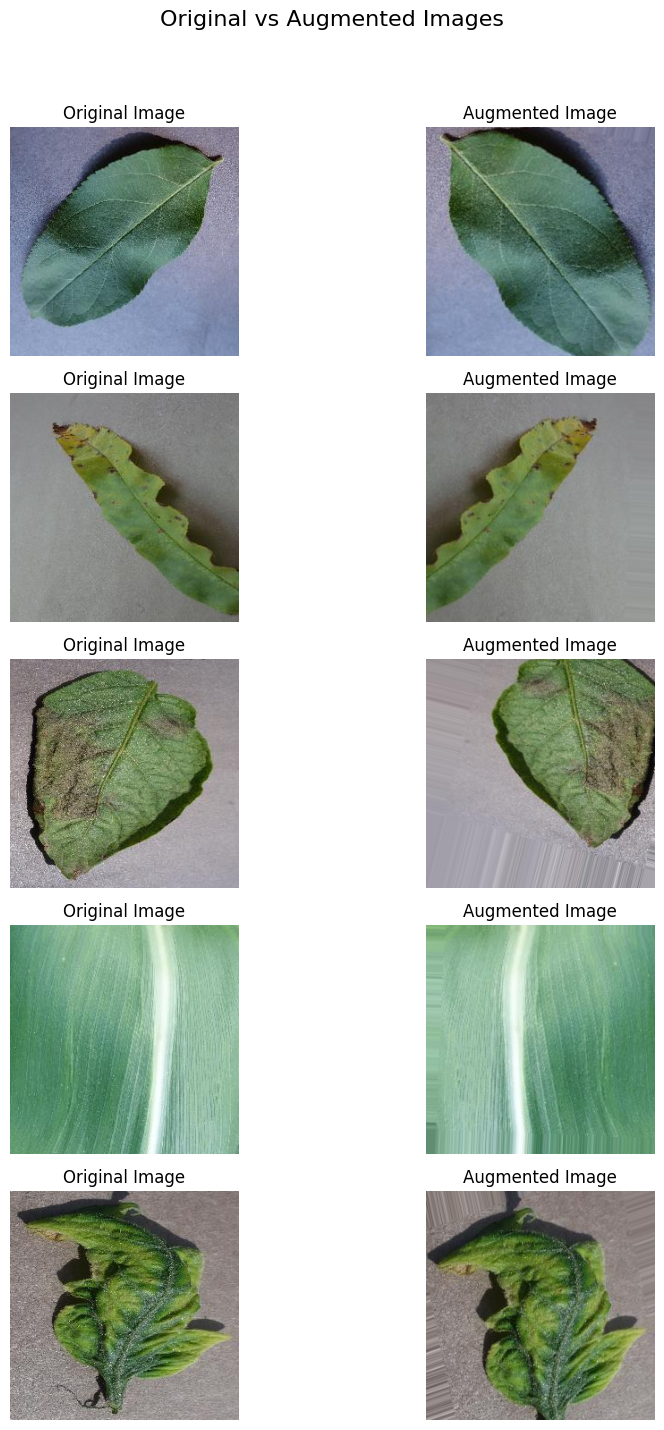

In [44]:
# Configuration of the image data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalization: scales pixel values between 0 and 1
    rotation_range=20,  # Random rotation up to 20 degrees
    width_shift_range=0.2,  # Random horizontal shift up to 20% of the width
    height_shift_range=0.2,  # Random vertical shift up to 20% of the height
    zoom_range=0.2,  # Random zoom up to 20%
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Filling missing pixels with the nearest value
)

# Generator for the validation or test set (without augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Only normalization

# Load images from the file system
train_generator = train_datagen.flow_from_directory(
    "../../Dataset/New Plant Diseases Dataset(Augmented)/train",  # Path to the training dataset
    target_size=(256, 256),  # Resize images to 224x224
    batch_size=32,  # Number of images per batch
    class_mode='categorical'  # Type of labels: 'categorical' for multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    "../../Dataset/New Plant Diseases Dataset(Augmented)/valid",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Visualization of 5 images before and after processing
def plot_images_before_after(generator, num_images=5):
    # Get a batch of images from the generator
    images, _ = next(generator)

    # Number of images to display
    num_images = min(num_images, len(images))

    fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 3))
    fig.suptitle('Original vs Augmented Images', fontsize=16)

    for i in range(num_images):
        # Show the original image
        axes[i, 0].imshow(images[i])
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis('off')
        print("Before:",images[i])

        # Create a new augmented image (simulate data augmentation)
        augmented_img = train_datagen.random_transform(images[i])
        axes[i, 1].imshow(augmented_img)
        axes[i, 1].set_title("Augmented Image")
        axes[i, 1].axis('off')
        print("After:",augmented_img)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Get a batch from the validation generator to visualize the original images
validation_generator.reset()  # Ensure the generator starts from the beginning
images, labels = next(validation_generator)

# Denormalize images for correct visualization
#images = images * 255.0

# Display 5 images before and after processing
plot_images_before_after(validation_generator, num_images=5)


In [42]:
print("Dictionary containing classes:")
train_generator.class_indices

Dictionary containing classes:


{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [45]:
print("List of classes with index linked to dataset")
train_generator.classes

List of classes with index linked to dataset


array([ 0,  0,  0, ..., 37, 37, 37], dtype=int32)

## Results from first look at the dataset

We can see that the dataset was already normalized, the reason why we still see all pics with color is that the function imgshow of matplotlib can interpret range 1-255 as well as 0-1, and being the ratios of rgb the same, that's why we can still se the correct colors.